In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# loading the dataset to a pandas DataFrame object
car_df = pd.read_csv('Task_data.csv')

## Exploratory Data Analysis

In [4]:
car_df.head(5)

,registrationNumber,fuelType,monthOfFirstRegistration
0,ORZ1598,Diesel,2020-03-01 00:00:00 UTC
1,ORZ6755,Diesel,2020-03-01 00:00:00 UTC
2,RGZ3683,Diesel,2020-03-01 00:00:00 UTC
3,UIG7890,Diesel,2020-03-01 00:00:00 UTC
4,UIG8424,Diesel,2020-03-01 00:00:00 UTC


In [5]:
# renaming the column names in order to have a more namining
car_df.rename({'registrationNumber':'VRN',
              'monthOfFirstRegistration':'first_reg_date'}, 
              axis=1,
             inplace=True)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48605 entries, 0 to 48604
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VRN             48605 non-null  object
 1   fuelType        48605 non-null  object
 2   first_reg_date  48605 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


We notice that the **first_reg_date** is not a datetime object, we should fix it later

#### Missing values

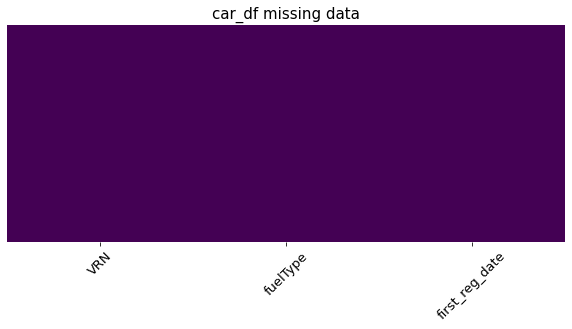

In [7]:
# the below heatmap depicts any missing value with yellow color
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(car_df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax1)
ax1.tick_params(axis='x', labelsize=13, rotation = 45)
ax1.set_title('car_df missing data', fontsize=15);

In [8]:
car_df.isnull().sum()

VRN               0
fuelType          0
first_reg_date    0
dtype: int64

**There are no missing values in the dataset**

#### Duplicated values

In [9]:
car_df.duplicated(keep=False).sum() 
# the dataframe.duplicated() method returns a boolean series denoting the duplicate rows
# the keep argument determines which duplicates to mark, keep=False marks all duplicate rows as TRUE, whule keep='first' mark duplicates as True except for the first occurrence
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

0

**All rows are unique**

### Registration Number feature

In [10]:
car_df.VRN.duplicated(keep=False).sum() 

0

All the cars are unique

### Fuel type feature

In [11]:
car_df.fuelType.value_counts()

Petrol           23683
Diesel           16833
Hybrid            6098
Pure electric     1937
Gas                 54
Name: fuelType, dtype: int64

In [ ]:
, color=['#3548db','#09ede6','#41e02f','#e84427']

<ipython-input-12-5d6de824e33f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])


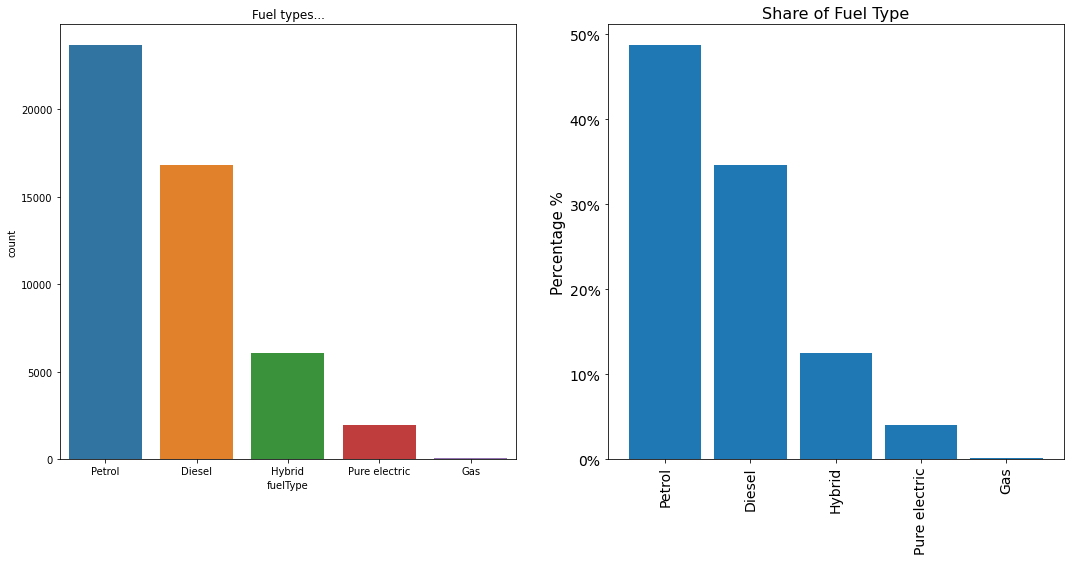

In [12]:
fig, axes = plt.subplots(1,2,figsize=(18,8))
ax1 = sns.countplot(x = 'fuelType', 
                    data = car_df, 
                    order = car_df.fuelType.value_counts().index, # ordering the bars based on their count (most common type is ordered first)
                    ax = axes[0])
ax1.set_title('Fuel types...')
#####
ax2 = (car_df.fuelType.value_counts() / len(car_df)).plot(kind='bar', 
                                                          width = 0.85, 
                                                          ax=axes[1])
ax2.set_title('Share of Fuel Type', fontsize=16)
#ax2.set_xticklabels(labels=['A','B','C','D'],rotation = 'horizontal')
ax2.set_ylabel('Percentage %', fontsize=15)
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.tick_params(labelsize=14);

<ipython-input-13-3ae88f3969a0>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts, autotexts = ax1.pie((car_df.fuelType.value_counts() / len(car_df)),


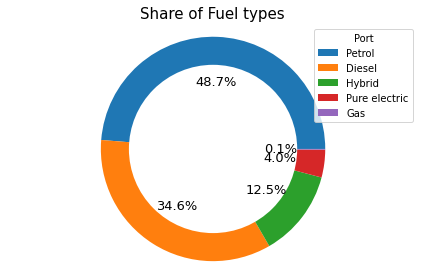

In [13]:
# credits to Kevin Amipara https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie((car_df.fuelType.value_counts() / len(car_df)),
                                    autopct='%.1f%%', 
                                    labels = None,
                                    textprops={'fontsize': 13})
ax1.set_title('Share of Fuel types', fontsize=15)
ax1.legend(title='Port', labels=['Petrol','Diesel','Hybrid','Pure electric','Gas'])
# just drawing a white circle in the center to create the "donut effect"
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

### Date of registration Number

In [34]:
car_df.first_reg_date.unique()

array(['2020-03-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
car_df.first_reg_date = car_df.first_reg_date.apply(lambda x: x[:10])

TypeError: 'Timestamp' object is not subscriptable

In [39]:
car_df.first_reg_date = pd.to_datetime(car_df.first_reg_date, format="%Y-%m-%d")
# was having an error when trying to convert the whole string to a date in a YYYY-MM-DD format
# thus i just kept the date and left out the time from the initial string and then format it to datetime object

In [40]:
car_df.first_reg_date

0       2020-03-01
1       2020-03-01
2       2020-03-01
3       2020-03-01
4       2020-03-01
           ...    
48600   2021-03-01
48601   2021-03-01
48602   2021-03-01
48603   2021-03-01
48604   2021-03-01
Name: first_reg_date, Length: 48605, dtype: datetime64[ns]

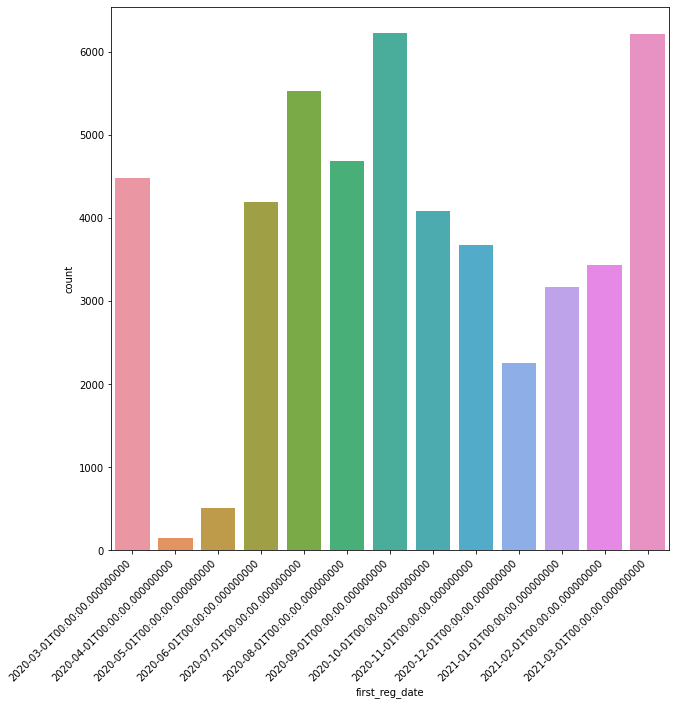

In [42]:
fig = plt.figure(figsize=(10,10))
sns.countplot(x='first_reg_date', data=car_df)
plt.xticks(rotation=45, ha='right');